## Aerial Cactus Identification

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
print(os.listdir(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -18\aerial-cactus-identification"))

['.ipynb_checkpoints', 'sample_submission.csv', 'submission_3.csv', 'test', 'train', 'train.csv', 'Untitled-Copy1.ipynb', 'Untitled.ipynb']


In [50]:
train = pd.read_csv(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -18\aerial-cactus-identification\train.csv")

In [56]:
train.id.describe()
train.shape

(17500, 2)

In [55]:
y_train = train["has_cactus"]
X_train = train.drop(labels = ["has_cactus"], axis = 1)

0    1
1    1
2    1
3    1
4    1
Name: has_cactus, dtype: int64

## Preparing Images

In [57]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 32, 32, 3))
    count = 0
    
    for fig in train['id']:
        
        #load images into images of size 100x100x3
        img = image.load_img("C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -18/aerial-cactus-identification/train/"+path+"/"+fig, target_size=(32, 32, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [58]:
x_train = prepareImages(train, train.shape[0], "train")

Processing image:  1 ,  0004be2cfeaba1c0361d39e2b000257b.jpg
Processing image:  501 ,  07527b04f4cef81471fb553253bbbe45.jpg
Processing image:  1001 ,  0e51fcc0b1c9a27bf428979edf0ce196.jpg
Processing image:  1501 ,  1524b107af6156c1739f46fb63fa1b2e.jpg
Processing image:  2001 ,  1bf414beb61746b8d58b359d8197cddc.jpg
Processing image:  2501 ,  22ffc1f777604bcec03051103ee9b6fd.jpg
Processing image:  3001 ,  2a571bd7df9fa35dee864f6686924a36.jpg
Processing image:  3501 ,  310ecd3074b9c78395a3fe1f184d846e.jpg
Processing image:  4001 ,  382c565870e21cadb89d907659bb837b.jpg
Processing image:  4501 ,  3fd99a51bb0bc9e4aa85bd03344fd96f.jpg
Processing image:  5001 ,  47ceec37bfa02f225fa476ad5f4b76a7.jpg
Processing image:  5501 ,  4f3e59c27d3289d28dc92fe7aec7a43e.jpg
Processing image:  6001 ,  56819e7bfc790a641fec25b30751932f.jpg
Processing image:  6501 ,  5dc5c2eab9b4275b88d6821a2564e659.jpg
Processing image:  7001 ,  64b32791d9d93aeec4614f2004ba7ba1.jpg
Processing image:  7501 ,  6bcebba887c179eca

In [59]:
x_train.shape

(17500, 32, 32, 3)

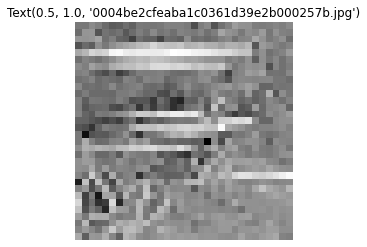

In [60]:
# Some examples(first one)
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[0,0]))
plt.axis("off")
plt.show()

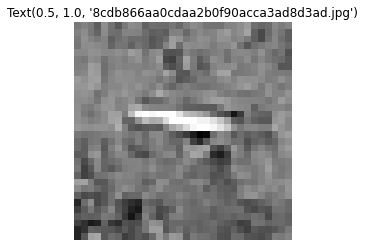

In [61]:
# Some examples(last one)
plt.imshow(x_train[9800][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[9800,0]))
plt.axis("off")
plt.show()

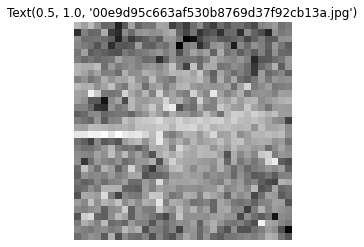

In [62]:
# Some examples(55th)
plt.imshow(x_train[55][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[55,0]))
plt.axis("off")
plt.show()

## Array

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [64]:
y_train = label_encoder.fit_transform(y_train)

In [68]:
print(y_train[0:10])
print(y_train.shape)
print(train.has_cactus.unique())

[1 1 1 1 1 1 0 0 1 1]
(17500,)
[1 0]


In [69]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 2)

In [70]:
#converted
print(y_train.shape)
y_train #let's look at vectors

(17500, 2)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## Modeling

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

In [72]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [73]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## We can also use categorical Entropy ##

In [74]:
history=model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
14000/14000 [==============================] - 14s 1ms/step - loss: 0.3474 - acc: 0.8956
Epoch 2/10
14000/14000 [==============================] - 14s 1ms/step - loss: 0.1196 - acc: 0.9542
Epoch 3/10
14000/14000 [==============================] - 14s 1ms/step - loss: 0.0923 - acc: 0.9676
Epoch 4/10
14000/14000 [==============================] - 14s 1ms/step - loss: 0.0685 - acc: 0.9743
Epoch 5/10
14000/14000 [==============================] - 15s 1ms/step - loss: 0.0587 - acc: 0.9792
Epoch 6/10
14000/14000 [==============================] - 15s 1ms/step - loss: 0.0480 - acc: 0.9841
Epoch 7/10
14000/14000 [==============================] - 16s 1ms/step - loss: 0.0502 - acc: 0.9833
Epoch 8/10
14000/14000 [==============================] - 18s 1ms/step - loss: 0.0448 - acc: 0.9859
Epoch 9/10
14000/14000 [==============================] - 18s 1ms/step - loss: 0.0610 - acc: 0.9851
Epoch 10/10
14000/14000 [==============================] - 18s 1ms/step - loss: 0.0378 - acc: 0.9877

In [75]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Test Accuracy:acc: 98.23%


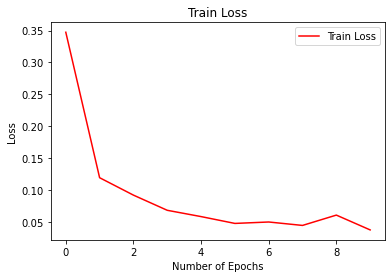

In [76]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

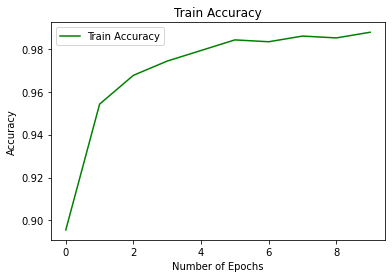

In [77]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.9877142857142858


In [79]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.03780064923076757


## Prediction

In [80]:
test = os.listdir(r"C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -18/aerial-cactus-identification/test/test/")
print(len(test))

4000


In [81]:
col = ['Image']
test_data = pd.DataFrame(test, columns=col)
test_data['has_cactus'] = ''

In [82]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages_test(train, shape, path):
    
    x_train = np.zeros((shape, 32, 32, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img("C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -18/aerial-cactus-identification/test/"+path+"/"+fig, target_size=(32, 32, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [83]:
x_test = prepareImages_test(test_data, test_data.shape[0], "test")

Processing image:  1 ,  000940378805c44108d287872b2f04ce.jpg
Processing image:  501 ,  2046a83b3760832a7c36a3b49dc46def.jpg
Processing image:  1001 ,  3e93a4783dcbd7b881d872a68d180515.jpg
Processing image:  1501 ,  5e111e9b105c5a9f2dadda88b4132a59.jpg
Processing image:  2001 ,  7ff6f49dad5c18134b7d1654916aa3bb.jpg
Processing image:  2501 ,  9e8e2fb740af01ffca4907bd3c0671c6.jpg
Processing image:  3001 ,  c0d852d57a4c0e3dd92c57d43a406656.jpg
Processing image:  3501 ,  e0cc2f1c3a2ec91df4bc03d29df9b98a.jpg


In [84]:
x_test /= 255

In [85]:
predictions = model.predict(np.array(x_test), verbose=1)

4000/4000 [==============================] - 1s 333us/step


In [99]:
predictions

array([[0.9840131 , 0.01598691],
       [0.98331165, 0.01668834],
       [0.98369056, 0.01630951],
       ...,
       [0.9839893 , 0.01601073],
       [0.98334044, 0.0166596 ],
       [0.9843262 , 0.01567381]], dtype=float32)

In [104]:
test_data['has_cactus'] = predictions

In [106]:
test_data.head(10)

,Image,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.984013
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.983312
2,001ee6d8564003107853118ab87df407.jpg,0.983691
3,002e175c3c1e060769475f52182583d0.jpg,0.984804
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.983712
5,0038ed6f7417b8275b393307f66cb1e3.jpg,0.983828
6,0059dfa41de4441fc23b9a4b98ba99cb.jpg,0.983268
7,0061bd302d735db829418cb90b4e6040.jpg,0.983466
8,00754573d8c7223e73da553dd43780bd.jpg,0.983981
9,008d9fce71c8e03a4c9cdd15ea908573.jpg,0.984348


In [107]:
test_data.to_csv('submission_3.csv', index=False)